### Importation des bibliothèques et des modules
Nous utiliserons ces modules pour nous aider à manipuler les données et à visualiser les caractéristiques ainsi qu'à mesurer la performance de notre modèle. Numpy et Pandas sont utiles pour manipuler les jeux de donnée, ses colonnes et cellules. Nous utiliserons matplotlib avec Seaborn pour visualiser nos données.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("data"))

['2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv', 'socrata_metadata_2015-building-energy-benchmarking.json', 'socrata_metadata_2016-building-energy-benchmarking.json']


In [2]:
training = pd.read_csv("data/2015-building-energy-benchmarking.csv", index_col="OSEBuildingID")
testing = pd.read_csv("data/2016-building-energy-benchmarking.csv", index_col="OSEBuildingID")

In [3]:
training.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
testing.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Gestion des doublons

In [5]:
print(training.duplicated().sum())
training = training.drop_duplicates()

0


In [6]:
print(testing.duplicated().sum())
testing = testing.drop_duplicates()

0


### Premier tri fonctionnel

In [7]:
def difference_columns(df1, df2):
    print(df1.columns.difference(df2.columns))
    print(df2.columns.difference(df1.columns))

In [8]:
difference_columns(training, testing)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')
Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')


In [9]:
training.rename(columns={"Zip Codes": "ZipCode", 
                          "Comment": "Comments", 
                          "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity",
                          "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions",
                         }, inplace=True)
difference_columns(training, testing)

Index(['2010 Census Tracts', 'City Council Districts', 'Location',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index(['Address', 'City', 'Latitude', 'Longitude', 'State'], dtype='object')


In [10]:
longitude, latitude, address, city, state, zipcode = [], [], [], [], [], []
for location in training["Location"]:
    location_dict = eval(location)
    longitude.append(location_dict["longitude"])
    latitude.append(location_dict["latitude"])
    human_address_dict = eval(location_dict["human_address"])
    address.append(human_address_dict['address'])
    city.append(human_address_dict['city'])
    state.append(human_address_dict['state'])
    zipcode.append(human_address_dict['zip'])
training['Longitude'] = longitude
training['Latitude'] = latitude
training['Address'] = address
training['City'] = city
training['State'] = state
training['ZipCode'] = zipcode

In [11]:
training.drop(columns=['Location'], inplace=True)

In [12]:
difference_columns(training, testing)

Index(['2010 Census Tracts', 'City Council Districts', 'OtherFuelUse(kBtu)',
       'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index([], dtype='object')


### Gestion des valeurs manquantes

In [13]:
def null_table(dataframe):
    print("Data Frame")
    print(pd.isnull(dataframe).sum()[pd.isnull(dataframe).sum() != 0])

In [14]:
null_table(training)

Data Frame
TaxParcelIdentificationNumber                                       2
NumberofFloors                                                      8
ListOfAllPropertyUseTypes                                         127
LargestPropertyUseType                                            136
LargestPropertyUseTypeGFA                                         136
SecondLargestPropertyUseType                                     1781
SecondLargestPropertyUseTypeGFA                                  1781
ThirdLargestPropertyUseType                                      2780
ThirdLargestPropertyUseTypeGFA                                   2780
YearsENERGYSTARCertified                                         3230
ENERGYSTARScore                                                   780
SiteEUI(kBtu/sf)                                                   10
SiteEUIWN(kBtu/sf)                                                 10
SourceEUI(kBtu/sf)                                                 10
SourceEUI

In [15]:
null_table(testing)

Data Frame
ZipCode                              16
NumberofBuildings                     8
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
YearsENERGYSTARCertified           3257
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
Comments                           3376
Outlier                            3344
TotalGHGEmissions            

In [16]:
def rotate_labels(axes):
    for item in axes.get_xticklabels():
        item.set_rotation(90)

def missing_values_graph(missing_group):
    percent_of_nans = missing_group['percent_of_nans']
    low_nans = missing_group['low_nans']
    middle_nans = missing_group['middle_nans']
    high_nans = missing_group['high_nans']
    zero_nan_features = missing_group['zero_nan_features']
    useless_features = missing_group['useless_features']
    
    print("Caractéristiques sans valeurs manquantes : \n", zero_nan_features.index.values)
    print("Caractéristiques inutilisables : \n", useless_features.index.values)
        
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.distplot(percent_of_nans, bins=100, kde=False, ax=axs[0, 0])
    axs[0, 0].set(title="Pourcentage de valeur NaN par caractéristiques", xlabel="% de NaN", ylabel="Nombre de caractéristiques")
    
    lows = sns.barplot(x=low_nans.index.values, y=low_nans.values, palette="Greens", ax=axs[0, 1])
    rotate_labels(lows)
    axs[0, 1].set(ylabel="% de NaN", title="Taux faible de NaN")
    
    middle = sns.barplot(x=middle_nans.index.values, y=middle_nans.values, palette="Oranges", ax=axs[1, 0])
    rotate_labels(middle)
    axs[1, 0].set(title="Taux moyen de NaN", ylabel="% de NaN")
    
    high = sns.barplot(y=high_nans.values, x=high_nans.index.values, palette="Reds", ax=axs[1, 1])
    rotate_labels(high)
    axs[1, 1].set(title="Taux élevé de NaN", ylabel="% de NaN")
    
    fig.tight_layout()
    plt.show()

def calculate_missing_group(df):
    percent_of_nans = df.isnull().sum().sort_values() / df.shape[0] * 100
    low_nans = percent_of_nans[(percent_of_nans > 0) & (percent_of_nans <=15)]
    middle_nans = percent_of_nans[(percent_of_nans > 15) & (percent_of_nans <= 50)]
    high_nans = percent_of_nans[(percent_of_nans > 50) & (percent_of_nans < 100)]
    zero_nan_features = percent_of_nans[percent_of_nans == 0]
    useless_features = percent_of_nans[percent_of_nans == 100]
    return dict({"percent_of_nans": percent_of_nans, "low_nans": low_nans, 'middle_nans': middle_nans, 'high_nans': high_nans, 'zero_nan_features': zero_nan_features, 'useless_features': useless_features})

In [17]:
missing_group_train = calculate_missing_group(training)
missing_group_test = calculate_missing_group(testing)

Caractéristiques sans valeurs manquantes : 
 ['DataYear' 'Address' 'Latitude' 'Longitude' 'ZipCode' 'ComplianceStatus'
 'City' 'PropertyGFABuilding(s)' 'PropertyGFAParking' 'PropertyGFATotal'
 'State' 'NumberofBuildings' 'Neighborhood' 'PropertyName'
 'CouncilDistrictCode' 'BuildingType' 'YearBuilt' 'PrimaryPropertyType']
Caractéristiques inutilisables : 
 []


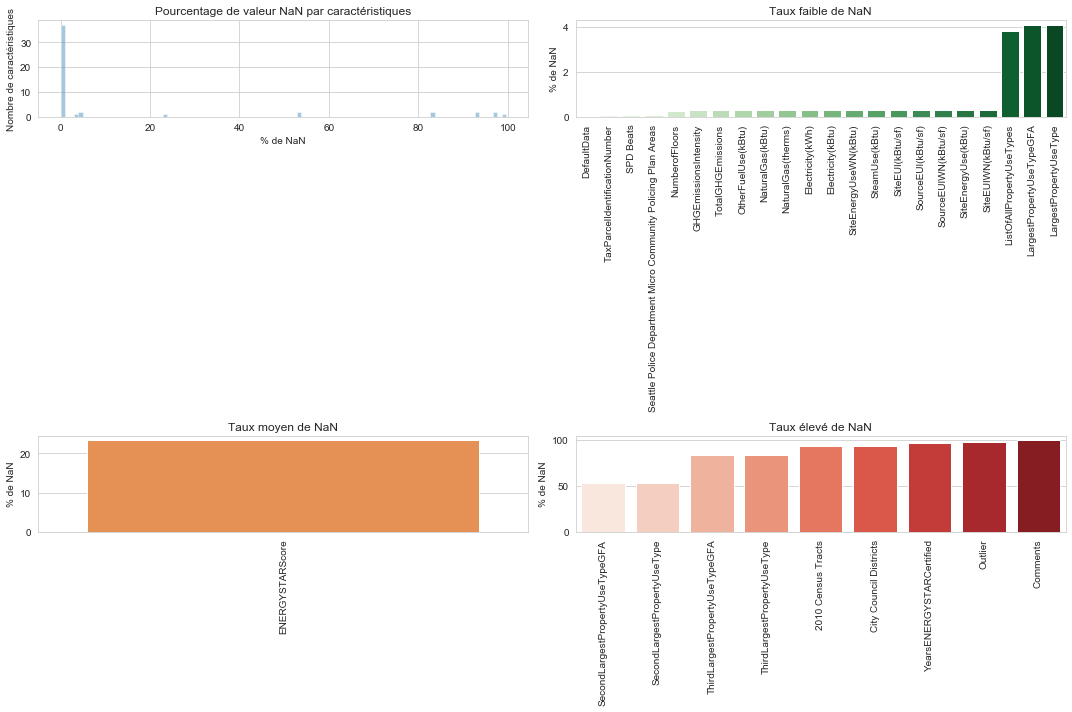

In [18]:
missing_values_graph(missing_group_train)

Caractéristiques sans valeurs manquantes : 
 ['DataYear' 'PropertyGFABuilding(s)' 'PropertyGFAParking'
 'PropertyGFATotal' 'NumberofFloors' 'YearBuilt' 'Longitude' 'Latitude'
 'DefaultData' 'Neighborhood' 'TaxParcelIdentificationNumber'
 'ComplianceStatus' 'State' 'City' 'Address' 'PropertyName'
 'PrimaryPropertyType' 'BuildingType' 'CouncilDistrictCode']
Caractéristiques inutilisables : 
 ['Comments']


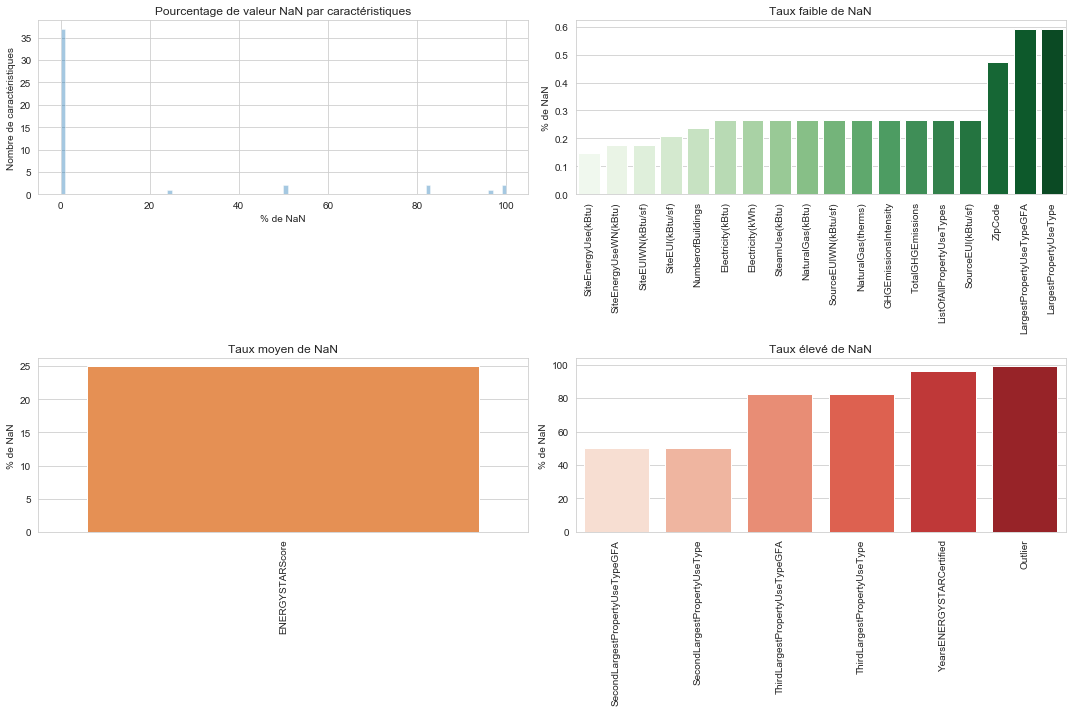

In [19]:
missing_values_graph(missing_group_test)

In [20]:
training = training.drop(missing_group_train['high_nans'].index, axis=1)
training = training.drop(missing_group_train['useless_features'].index, axis=1)
testing = testing.drop(missing_group_test['high_nans'].index, axis=1)
testing = testing.drop(missing_group_test['useless_features'].index, axis=1)

In [21]:
training.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Longitude,Latitude,Address,City,State
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,...,No,Compliant,14.0,31.0,98101,-122.33799744,47.61219025,405 OLIVE WAY,SEATTLE,WA
2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,...,No,Compliant,14.0,31.0,98101,-122.33335756,47.61310583,724 PINE ST,SEATTLE,WA
3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,...,Yes,Compliant,56.0,31.0,98101,-122.33769944,47.61334897,1900 5TH AVE,SEATTLE,WA
5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,...,No,Compliant,56.0,31.0,98101,-122.33660889,47.61421585,620 STEWART ST,SEATTLE,WA
8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,...,No,Compliant,56.0,31.0,98121,-122.3409238,47.6137544,401 LENORA ST,SEATTLE,WA


In [22]:
testing.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


### Gestion des valeurs aberrantes

In [23]:
training.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
count,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,2560.000000,...,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,3338.000000,3338.000000
mean,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,67.894141,...,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,32.380168,24.825644
std,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,27.154057,...,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,19.907567,15.006287
min,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,51.750000,...,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,14.000000,10.000000
50%,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,76.000000,...,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,33.000000,26.000000
75%,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,90.000000,...,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,50.000000,38.000000
max,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,100.000000,...,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,61.000000,51.000000


In [24]:
training_num = training.loc[:, (training.dtypes == float)]

In [25]:
training_num.describe()

,NumberofFloors,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
count,3332.000000,3.204000e+03,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,3338.000000,3338.000000
mean,4.682173,7.488154e+04,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,32.380168,24.825644
std,5.458460,1.236249e+05,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,19.907567,15.006287
min,0.000000,5.872000e+03,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.500000e+04,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,14.000000,10.000000
50%,4.000000,3.900000e+04,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,33.000000,26.000000
75%,5.000000,7.206750e+04,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,50.000000,38.000000
max,99.000000,1.719643e+06,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,61.000000,51.000000


In [26]:
for column in training_num.columns:
    mean = training_num[column].mean()
    std = training_num[column].std()
    limitMax = mean + 2 * std
    limitMin = mean - 2 * std
    for index in training_num[column].index:
        value = training_num.at[index, column]
        if value > limitMax or value < limitMin:
            training_num.at[index, column] = np.nan

In [27]:
training_num.describe()

,NumberofFloors,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
count,3221.000000,3111.000000,2416.000000,3189.000000,3194.000000,3197.000000,3200.000000,3.253000e+03,3.252000e+03,3.308000e+03,3.242000e+03,3.242000e+03,3279.00000,3.279000e+03,3324.000000,3281.000000,3212.000000,3338.000000,3338.000000
mean,3.874573,58225.722276,71.615066,44.709595,48.660301,112.310979,118.907625,3.460407e+06,3.645979e+06,6.553793e+04,6.857944e+05,2.340028e+06,8814.20677,8.814204e+05,430.159747,75.640198,0.755131,32.380168,24.825644
std,2.382736,54027.816118,23.108888,26.370815,28.526134,64.558975,65.448793,4.672177e+06,4.728643e+06,4.667897e+05,9.476540e+05,3.233530e+06,15045.52890,1.504553e+06,9587.011398,118.521614,0.904908,19.907567,15.006287
min,0.000000,5872.000000,14.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,24804.500000,57.000000,27.000000,29.500000,72.700000,79.300000,8.964030e+05,9.770828e+05,0.000000e+00,1.837495e+05,6.269800e+05,0.00000,0.000000e+00,0.000000,9.040000,0.080000,14.000000,10.000000
50%,4.000000,37804.000000,78.000000,36.300000,39.800000,93.100000,101.250000,1.725035e+06,1.887692e+06,0.000000e+00,3.274060e+05,1.117156e+06,2716.00000,2.716370e+05,0.000000,31.360000,0.410000,33.000000,26.000000
75%,5.000000,66638.000000,91.000000,55.700000,61.800000,133.600000,140.500000,3.732139e+06,4.010721e+06,0.000000e+00,7.355002e+05,2.509632e+06,10562.50000,1.056261e+06,0.000000,84.000000,1.060000,50.000000,38.000000
max,15.000000,321828.000000,100.000000,161.400000,168.100000,391.500000,400.000000,3.238184e+07,3.257966e+07,6.765824e+06,6.561583e+06,2.238905e+07,100512.00000,1.005123e+07,337952.000000,900.810000,4.230000,61.000000,51.000000


### Transformation de variables catégorielles

In [28]:
training.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SPD Beats', 'ZipCode', 'Longitude', 'Latitude', 'Address', 'City',
       'State'],
      dtype='object')